In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get Traing and Test Data
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')

In [3]:
# Inspect Training Data
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Get Training Labels
labels = train['label'].values

In [5]:
# View the unique labels
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

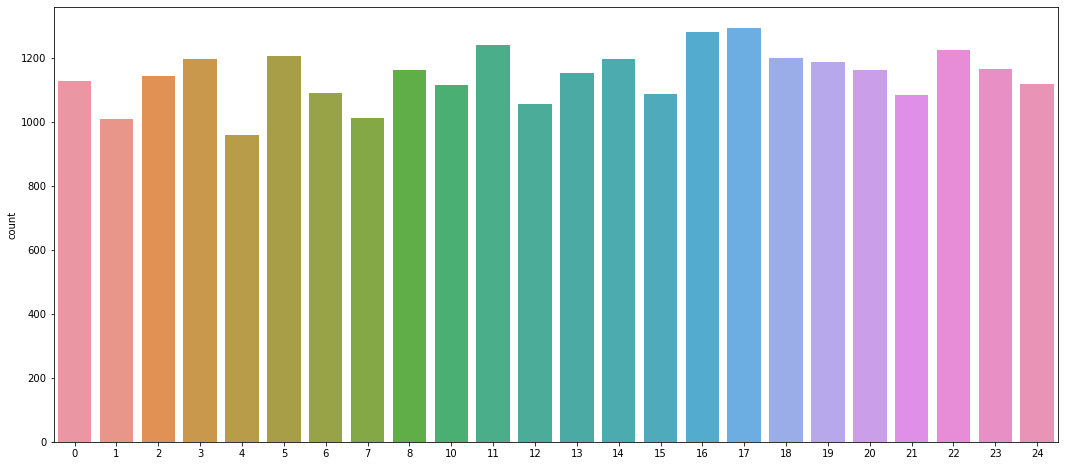

In [6]:
# Ploat the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [7]:
# Drop training labels from training data
train.drop('label', axis = 1, inplace = True)

In [8]:
# Extract the image data from each row in csv
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


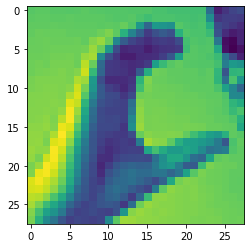

In [11]:
# inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
import cv2
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow('sample image', sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
x_train = x_train / 255
x_test = x_test / 255

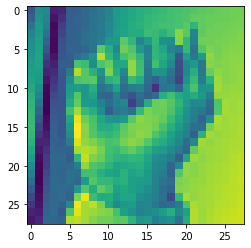

In [16]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [17]:
# Create CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0,20))

model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [20]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10


TypeError: in user code:

    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\user\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\user\anaconda3\lib\site-packages\keras\layers\core\dropout.py", line 96, in _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: Exception encountered when calling layer "dropout" (type Dropout).
    
    'int' object is not iterable
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 128), dtype=float32)
      • training=True


In [21]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

NameError: name 'history' is not defined

In [23]:
test_labels = test['label']
test.drop('label', axis = 1, inplace=True)

test_images = test.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0],28,28,1)

test_images.shape

y_pred = model.predict(test_images)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.012130507529280535